# TP2: Recherche de zeros et minimisation de fonctions à plusieurs variables

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import scipy as sc
import scipy.optimize as opt

from time import time

## Partie 1: Methode de Newton-Raphson

## Exemples

In [2]:
print(f"zero du sinus obtenu en x={ round(opt.bisect(np.sin, -np.pi/2, np.pi/2), 3) } avec la methode de dicothomie\n")

for x0 in [0.1, 1.55, np.pi/2]:
    sol = round(opt.newton(np.sin, x0, fprime=np.cos), 3)
    print(f"zero du sinus obtenu en x={ sol } avec la methode de Newton-Raphson avec x0={ x0 }")
    print(f"sin({ sol }) = { round(np.sin(sol), 3) }\n")

zero du sinus obtenu en x=0.0 avec la methode de dicothomie

zero du sinus obtenu en x=0.0 avec la methode de Newton-Raphson avec x0=0.1
sin(0.0) = 0.0

zero du sinus obtenu en x=-47.124 avec la methode de Newton-Raphson avec x0=1.55
sin(-47.124) = 0.0

zero du sinus obtenu en x=-1.6331239353195368e+16 avec la methode de Newton-Raphson avec x0=1.5707963267948966
sin(-1.6331239353195368e+16) = -0.658



On ne converge pas vers une racine avec la methode de Newton-Raphson lorsque l'on prend une valeur de depart egale à pi/2 car on a alors un point fixe d'ordre 2 entre -pi/2 et pi/2

In [3]:
for n in [5, 10, 20, 40]:
    sol = opt.newton(np.exp, 0, fprime=np.exp, maxiter=n, disp=False)
    print(f"pour maxiter={ n } on trouve comme resultat finale comme racine de l'exponentiel x={sol}\n")

pour maxiter=5 on trouve comme resultat finale comme racine de l'exponentiel x=-5.0

pour maxiter=10 on trouve comme resultat finale comme racine de l'exponentiel x=-10.0

pour maxiter=20 on trouve comme resultat finale comme racine de l'exponentiel x=-20.0

pour maxiter=40 on trouve comme resultat finale comme racine de l'exponentiel x=-40.0



On remarque que cette methode pour l'exponetiel conerge vers -n en n iteration.

C'est le cas car $x_n = x_{n - 1} - \frac{ e^{x_{n - 1}} }{ e^{x_{n - 1}} } = x_{n - 1} - 1$ et donc avec $x_0 = 1$ on obtient $x_n = -n$.

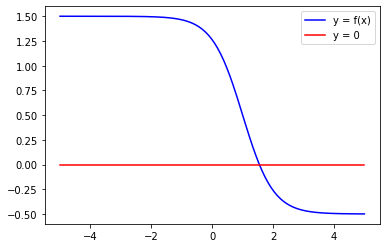

In [4]:
f = lambda x: 1/2 - np.tanh(x - 1)
X = np.linspace(-5, 5, 200)

plt.plot(X, f(X), 'b', label="y = f(x)")
plt.plot(X, np.zeros(len(X)), 'r', label="y = 0")
plt.legend()
plt.show()

In [5]:
sol_d = opt.bisect(f, -5, 5)
print(f"zero de f en x={ sol_d } avec la methode de dicothomie")
print(f"f({ sol_d }) = { f(sol_d) }\n")

for x0 in [0, 1, 2]:
    sol_n = opt.newton(f, x0)
    print(f"zero de f en x={ sol_n } avec la methode de newton pour x0={ x0 }")
    print(f"f({ sol_n }) = { f(sol_n) }\n")

zero de f en x=1.5493061443351053 avec la methode de dicothomie
f(1.5493061443351053) = -7.878142582740111e-13

zero de f en x=1.5493061443340548 avec la methode de newton pour x0=0
f(1.5493061443340548) = 5.551115123125783e-17

zero de f en x=1.5493061443340548 avec la methode de newton pour x0=1
f(1.5493061443340548) = 5.551115123125783e-17

zero de f en x=1.5493061443340548 avec la methode de newton pour x0=2
f(1.5493061443340548) = 5.551115123125783e-17



In [6]:
eps = 1e-2
born_sup, born_inf = sol_d + eps, sol_d - eps

while True:
    try:
        sol_n = opt.newton(f, born_sup)
        if abs(sol_n - sol_d) > eps: # mauvaise convergence
            break
    except: # erreur
        break
    born_sup += eps

while True:
    try:
        sol_n = opt.newton(f, born_inf)
        if abs(sol_n - sol_d) > eps: # mauvaise convergence
            break
    except: # erreur
        break
    born_inf -= eps

print(f"On a convergence de la methode de Newton pour x dans [{ born_inf }, { born_sup }]")

On a convergence de la methode de Newton pour x dans [-0.14069385566489595, 3.1493061443350814]


## Partie 2: Equilibre

In [7]:
def f(x, alpha):
    return 4* x**3 - 4* x + alpha # dérivé de V

def df(x, alpha):
    return 12* x**2 - 4 # dérivé de f

res = opt.newton(f, 2, fprime=df, args=(0,))
print(f"Minimum trouvé en x={ res } pour alpha=0")

Minimum trouvé en x=1.0 pour alpha=0


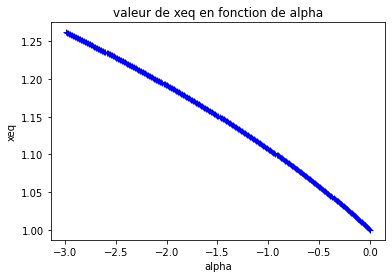

In [8]:
delta_alpha = 0.01

alphas = -np.arange(0, 3, delta_alpha)
xeq = [res]
for alpha in alphas[1:]:
    xeq.append(opt.newton(f, xeq[-1], fprime=df, args=(alpha,)))

plt.plot(alphas, xeq, 'b+')
plt.title("valeur de xeq en fonction de alpha")
plt.xlabel("alpha")
plt.ylabel("xeq")
plt.show()

Cette methode correspond à une variation adiabatique car on "fait varier alpha plus lentement que le temps caracteristique d'evolution" car l'equilibre est atteind entre chaque variation de alpha.

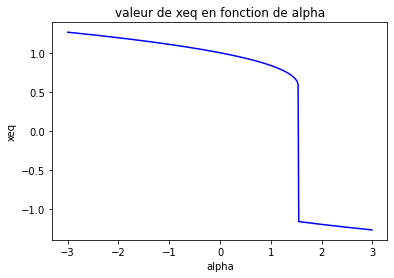

In [9]:
delta_alpha = 0.013

alphas2 = np.arange(-3, 3, delta_alpha)
xeq2 = [xeq[-1]]
for alpha in alphas2[1:]:
    xeq2.append(opt.newton(f, xeq2[-1], fprime=df, args=(alpha,)))

plt.plot(alphas2, xeq2, 'b')
plt.title("valeur de xeq en fonction de alpha")
plt.xlabel("alpha")
plt.ylabel("xeq")
plt.show()

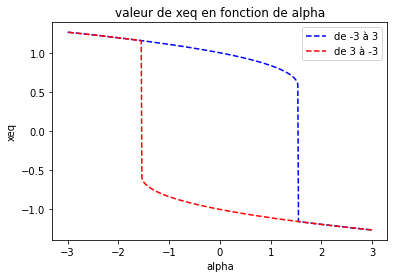

In [10]:
alphas3 = -alphas2
xeq3 = [xeq2[-1]]
for alpha in alphas3[1:]:
    xeq3.append(opt.newton(f, xeq3[-1], fprime=df, args=(alpha,)))

plt.plot(alphas2, xeq2, '--b', label="de -3 à 3")
plt.plot(alphas3, xeq3, '--r', label="de 3 à -3")
plt.title("valeur de xeq en fonction de alpha")
plt.xlabel("alpha")
plt.ylabel("xeq")
plt.legend()
plt.show()

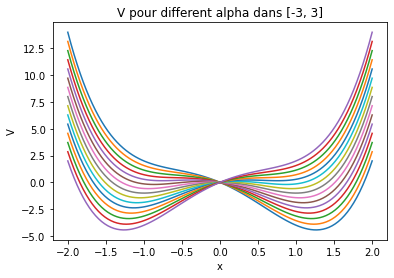

In [11]:
X = np.linspace(-2, 2, 100)

def V(x, alpha):
    return x**4 - 2 * x**2 + alpha * x

for alpha in np.linspace(-3, 3, 15):
    plt.plot(X, V(X, alpha), label=f"alpha={ alpha }")

plt.title("V pour different alpha dans [-3, 3]")
plt.xlabel("x")
plt.ylabel("V")
#plt.legend()
plt.show()

On peut voir que pour alpha croissant les point d'equilibre stable se deplace vers les x decroissant jusqu'à ce que un d'entre eux ne soit plus un point d'equilibre (coupure en alpha = 1.5).

## Partie 3: Agrégats de Lennard Jones

De maniere logique pour N = 2 la boite contenant les particule est de largeur $L = 1$.

À densité de particule egale, la taille de la boite grandirait en $L \propto N^{{1}\over{3}}$.

On prendra donc comme parametre par defaut (que l'on utilisera pour le reste du TP) $L = 2\times (N - 2)^{{1}\over{3}}$ (on prendra $L = 2$ pour $N - 2 \leqslant 0$).

In [12]:
def genbox(N, L=None):
    if L is None: # gerer le parametre par defaut
        L = 2 * (N - 2)**(1/3) if N - 2 > 0 else 2
    
    return np.random.rand(3*N) * L

On peut aussi reduire la taille de ce vecteur car le probleme est invariant par translation et rotation.

Pour prendre en compte simplement l'invariance par rotation on peut fixé la postion de la premiere particule $\overrightarrow{r_0} = \overrightarrow{0}$.

Pour fixer deux des trois angle d'euler on peut fixer le deplacement de la seconde particule dans la direction $\overrightarrow{u_z}$ tel que $\overrightarrow{r_1} = z_1 \overrightarrow{u_z}$.

Pour fixer le dernier angle d'euler on peut fixer le deplacement de la troisieme particule dans le plan $Oxz$ tel que $\overrightarrow{r_2} = z_2 \overrightarrow{u_z} + x_2 \overrightarrow{u_x}$

On peut donc ecrire une fonction $genbox\_smart(N, L)$ qui créer un ensemble de N particule selon ces regle et une fonction $smart\_to\_natural(box)$ qui prend une repartion de ce type et retourne une repartition naturel equivalente à celle de $genbox(N, L)$

In [13]:
def genbox_smart(N, L=None):
    return genbox(N - 2, L) # on pert 6 degrés de liberté ce qui equivaut à 2 particule

def smart_to_natural(box):
    natural_box = np.concatenate((np.zeros(9), box[3:])) # on rajoute les coordonée naturelles pour les
    # premieres particules et on enleves les coordoné particuliere
    
    natural_box[5] = box[0] # seconde particule
    natural_box[7:9] = box[1:3] # troisieme particule
    
    return natural_box

In [14]:
def Vlj(r_squared):
    op = 1/r_squared
    op_3 = op * op * op
    return (4 * op_3 * (op_3 - 1), # valeur de Vlj(r)
           24 * op * op_3 * (-2 * op_3 + 1)) # derivée de Vlj(r)

def Pot(box):
    pot, grad = 0, np.zeros(len(box))
    
    for j in range(len(box) // 3):
        for i in range(j): # i < j
            r_i = box[3*i: 3*(i+1)] # position de la particule i
            r_j = box[3*j: 3*(j+1)] # position de la particule j
            
            r_ij_vect = r_j - r_i # vecteur entre les deux particule
            r_ij = np.sum(r_ij_vect * r_ij_vect) # distance au carré entre les deux particules
            
            V, dV = Vlj(r_ij)
            
            pot += V
            grad[3*i: 3*(i+1)] -= dV * r_ij_vect
            grad[3*j: 3*(j+1)] += dV * r_ij_vect
    
    return pot, grad

In [15]:
res = opt.minimize(Pot,
                   genbox(13),
                   method="Newton-CG",
                   jac = True,
                  )

print(f"Energy minima: { res.fun }")
print(f"Ended successfully: { res.success }")
print(res.message)

Energy minima: -36.78024463015769
Ended successfully: False


Le minima obtenue n'est ici pas le minimum global attendu.

Si l'on veut maintenant utilisé les coordonées reduite décris precedement on doit ecrire une fonction $Pot\_smart(box)$ qui prend $box$ sous forme de coordonées reduite et retourne le potentiel.

Si l'on veut obtenir le vrai gradient sous cette forme on doit utiliser les gradient selon les axe fixe des trois premiere particule et les convertire en rotation et translation pour l'ensemble des autres particule.

On peut cependant essaier d'ignorer ces gradient en esperant que le systeme converge quand meme vers un minimum. On peut verifier cette hypothese en comparant le resultat obtenue avec des coordonées reduite et des coordonées naturelles.

In [16]:
def Pot_smart(box):
    V, dV = Pot(smart_to_natural(box))
    grad = np.concatenate((np.zeros(3), dV[9:])) # on ne garde que les particule inchangées
    
    grad[0] = dV[5] # seconde particule
    grad[1:3] = dV[7:9] # troisieme particule
    
    return V, grad

In [17]:
kwargs = {
    "method":"Newton-CG",
    "jac": True,
    }

for N in range(2, 15):
    if N <= 9: # pour limiter le temps de calcule
        t1 = time()
        res = opt.basinhopping(Pot, genbox(N), minimizer_kwargs=kwargs).lowest_optimization_result.fun
        t2 = time()

        print(f"Energie obnetue par l'optimisation simple pour N={ N } : { round(res, 3) } en { round(t2 - t1, 1) }s")
    
    if N >= 3: # car ca ne marche pas en dessous
        t1 = time()
        res = opt.basinhopping(Pot_smart, genbox_smart(N), minimizer_kwargs=kwargs).lowest_optimization_result.fun
        t2 = time()

        print(f"Energie obnetue par l'optimisation reduite pour N={ N } : { round(res, 3) } en { round(t2 - t1, 1) }s")
    
    print()

Energie obnetue par l'optimisation simple pour N=2 : -1.0 en 0.2s

Energie obnetue par l'optimisation simple pour N=3 : -3.0 en 0.8s
Energie obnetue par l'optimisation reduite pour N=3 : -3.0 en 0.7s

Energie obnetue par l'optimisation simple pour N=4 : -6.0 en 2.5s
Energie obnetue par l'optimisation reduite pour N=4 : -6.0 en 1.7s

Energie obnetue par l'optimisation simple pour N=5 : -9.104 en 6.3s
Energie obnetue par l'optimisation reduite pour N=5 : -9.104 en 3.5s

Energie obnetue par l'optimisation simple pour N=6 : -12.712 en 8.0s
Energie obnetue par l'optimisation reduite pour N=6 : -12.712 en 6.5s

Energie obnetue par l'optimisation simple pour N=7 : -16.505 en 28.3s
Energie obnetue par l'optimisation reduite pour N=7 : -12.712 en 9.5s

Energie obnetue par l'optimisation simple pour N=8 : -19.821 en 15.6s
Energie obnetue par l'optimisation reduite pour N=8 : -19.821 en 17.5s

Energie obnetue par l'optimisation simple pour N=9 : -24.113 en 28.4s
Energie obnetue par l'optimisation

On remarque que meme avec ces coordonées reduites, et le gradient simplifier on a convergence vers les bonne valeurs d'energie.